# *ANALYSIS OF SCHOOL DROPOUTS IN RURAL INDIA*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [90]:
# Sample data
data = {
    'Name': ['Rita', 'Gita', 'Mita', 'Sara', 'Ravi', 'Srija', 'Mohit', 'Rohit', 'Rohan', 'Amit'],
    'Studying': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'Last_Education': ['5th', '8th', '10th', '12th', '7th', '9th', '11th', '6th', '5th', '12th'],
    'Gender': ['Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male'],
    'Family_Income': [20000, 15000, 12000, 25000, 18000, 16000, 13000, 19000, 11000, 22000],
    'Family_Members': [6, 5, 7, 4, 8, 5, 6, 7, 8, 4],
    'BPL/APL': ['BPL', 'APL', 'BPL', 'APL', 'BPL', 'APL', 'BPL', 'APL', 'BPL', 'APL'],
    'Dropout_Type': ['Voluntary', 'Voluntary', 'Involuntary', 'Voluntary', 'Voluntary', 'N/A', 'Involuntary', 'N/A', 'Voluntary', 'N/A'],
    'Caste': ['SC', 'ST', 'OBC', 'General', 'OBC', 'SC', 'ST', 'General', 'OBC', 'SC'],
    'Age': [14, 16, 18, 17, 15, 14, 16, 15, 14, 17]
}

# Create DataFrame
df = pd.DataFrame(data)
df

,Name,Studying,Last_Education,Gender,Family_Income,Family_Members,BPL/APL,Dropout_Type,Caste,Age
0,Rita,No,5th,Female,20000,6,BPL,Voluntary,SC,14
1,Gita,Yes,8th,Female,15000,5,APL,Voluntary,ST,16
2,Mita,No,10th,Female,12000,7,BPL,Involuntary,OBC,18
3,Sara,Yes,12th,Female,25000,4,APL,Voluntary,General,17
4,Ravi,No,7th,Male,18000,8,BPL,Voluntary,OBC,15
5,Srija,Yes,9th,Female,16000,5,APL,N/A,SC,14
6,Mohit,No,11th,Male,13000,6,BPL,Involuntary,ST,16
7,Rohit,Yes,6th,Male,19000,7,APL,N/A,General,15
8,Rohan,No,5th,Male,11000,8,BPL,Voluntary,OBC,14
9,Amit,Yes,12th,Male,22000,4,APL,N/A,SC,17


In [88]:
# Display the DataFrame
df.head()

,Name,Studying,Last_Education,Gender,Family_Income,Family_Members,BPL/APL,Dropout_Type,Caste,Age
0,Rita,0,5th,Female,20000,6,1,1,SC,14
1,Gita,1,8th,Female,15000,5,0,1,ST,16
2,Mita,0,10th,Female,12000,7,1,2,OBC,18
3,Sara,1,12th,Female,25000,4,0,1,General,17
4,Ravi,0,7th,Male,18000,8,1,1,OBC,15


In [10]:
# Check for missing values
print("Missing values in the dataset:\n", df.isnull().sum())

Missing values in the dataset:
 Name              0
Studying          0
Last_Education    0
Gender            0
Family_Income     0
Family_Members    0
BPL/APL           0
Dropout_Type      0
Caste             0
Age               0
dtype: int64


In [12]:
# Summary statistics
print("\nSummary statistics of the dataset:\n", df.describe(include='all'))


Summary statistics of the dataset:
         Name   Studying Last_Education  Gender  Family_Income  Family_Members  \
count     10  10.000000             10      10       10.00000       10.000000   
unique    10        NaN              8       2            NaN             NaN   
top     Rita        NaN            5th  Female            NaN             NaN   
freq       1        NaN              2       5            NaN             NaN   
mean     NaN   0.500000            NaN     NaN    17100.00000        6.000000   
std      NaN   0.527046            NaN     NaN     4532.59798        1.490712   
min      NaN   0.000000            NaN     NaN    11000.00000        4.000000   
25%      NaN   0.000000            NaN     NaN    13500.00000        5.000000   
50%      NaN   0.500000            NaN     NaN    17000.00000        6.000000   
75%      NaN   1.000000            NaN     NaN    19750.00000        7.000000   
max      NaN   1.000000            NaN     NaN    25000.00000        8.0

In [14]:
# Convert categorical data to numerical values for analysis
df['Studying'] = df['Studying'].apply(lambda x: 1 if x == 'Yes' else 0)
df['BPL/APL'] = df['BPL/APL'].apply(lambda x: 1 if x == 'BPL' else 0)
df['Dropout_Type'] = df['Dropout_Type'].apply(lambda x: 1 if x == 'Voluntary' else (2 if x == 'Involuntary' else 0))

# Display the cleaned DataFrame
df.head()

,Name,Studying,Last_Education,Gender,Family_Income,Family_Members,BPL/APL,Dropout_Type,Caste,Age
0,Rita,0,5th,Female,20000,6,0,0,SC,14
1,Gita,0,8th,Female,15000,5,0,0,ST,16
2,Mita,0,10th,Female,12000,7,0,0,OBC,18
3,Sara,0,12th,Female,25000,4,0,0,General,17
4,Ravi,0,7th,Male,18000,8,0,0,OBC,15


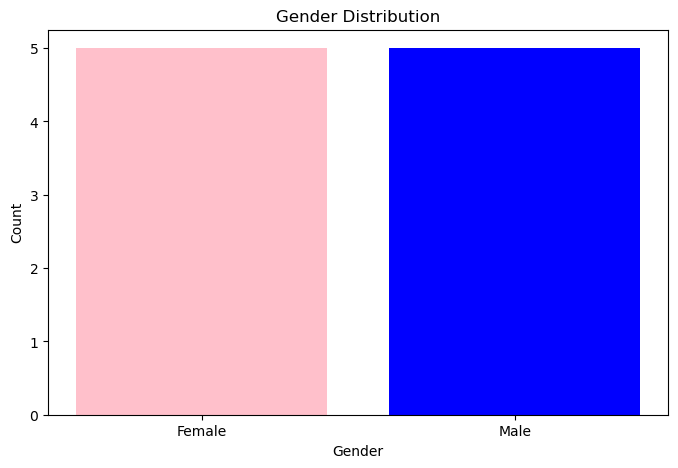

In [52]:
# Gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(gender_counts.index, gender_counts.values, color=['pink', 'blue'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

There is an equal distribution of males and females in our dataset. This balance helps ensure that our analysis is not biased towards any particular gender.

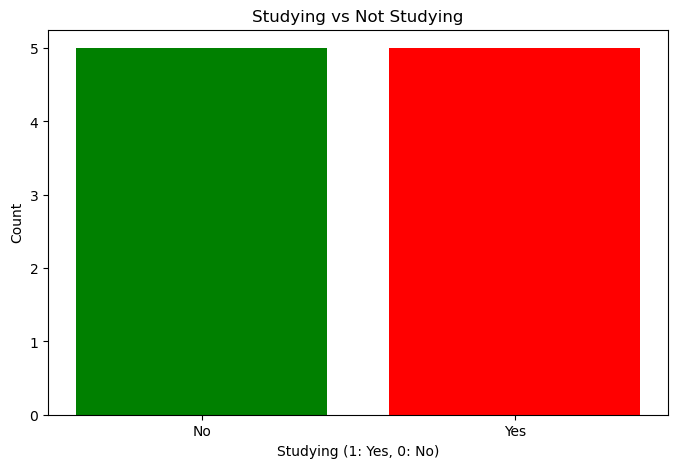

In [38]:
# Studying vs Not Studying
studying_counts = df['Studying'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(studying_counts.index, studying_counts.values, color=['green', 'red'])
plt.title('Studying vs Not Studying')
plt.xlabel('Studying (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

There are equal numbers of students who are currently studying (1) and not studying (0).

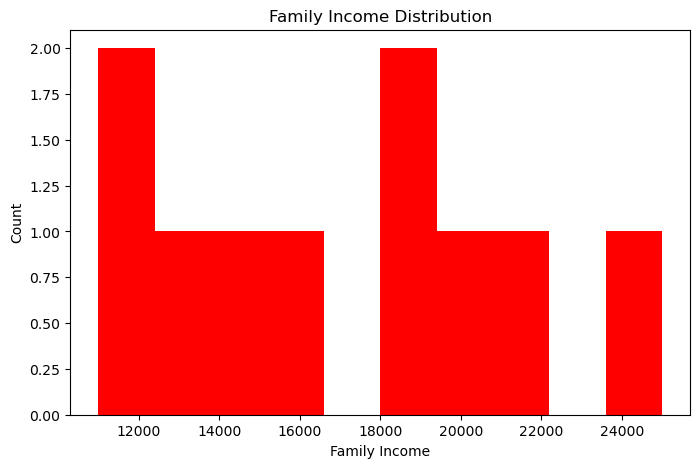

In [48]:
# Family income distribution
plt.figure(figsize=(8, 5))
plt.hist(df['Family_Income'], bins=10, color='red')
plt.title('Family Income Distribution')
plt.xlabel('Family Income')
plt.ylabel('Count')
plt.show()

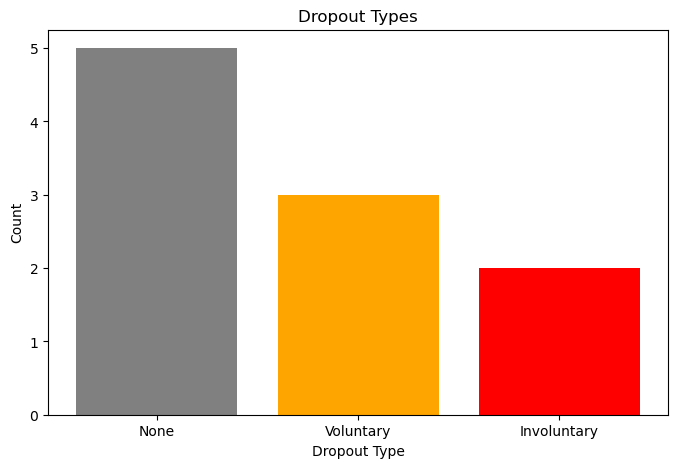

In [42]:
# Dropout types
dropout_counts = df['Dropout_Type'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(['None', 'Voluntary', 'Involuntary'], dropout_counts.values, color=['grey', 'orange', 'red'])
plt.title('Dropout Types')
plt.xlabel('Dropout Type')
plt.ylabel('Count')
plt.show()

-Dropouts are more often voluntary than involuntary. This may suggest that families, the economy, or a lack of enthusiasm in pursuing further education are among the reasons why students or their families decide to drop out.

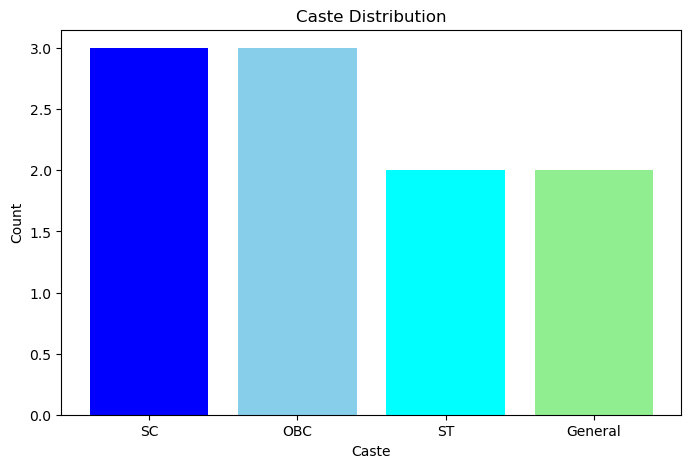

In [123]:
# Caste distribution
caste_counts = df['Caste'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(caste_counts.index, caste_counts.values, color=['blue', 'skyblue', 'cyan', 'lightgreen'])
plt.title('Caste Distribution')
plt.xlabel('Caste')
plt.ylabel('Count')
plt.show()

In accordance to the caste distribution, OBC and SC students are the majority of the student body, followed by ST, and General. This suggests that a sizeable percentage of the pupils come from historically underprivileged backgrounds.

In [70]:
# Convert categorical data to numerical values for analysis
df['Studying'] = df['Studying'].apply(lambda x: 1 if x == 'Yes' else 0)
df['BPL/APL'] = df['BPL/APL'].apply(lambda x: 1 if x == 'BPL' else 0)
df['Dropout_Type'] = df['Dropout_Type'].apply(lambda x: 1 if x == 'Voluntary' else (2 if x == 'Involuntary' else 0))

# Display the DataFrame to check conversion
print("DataFrame:\n", df)

DataFrame:
     Name  Studying Last_Education  Gender  Family_Income  Family_Members  \
0   Rita         0            5th  Female          20000               6   
1   Gita         1            8th  Female          15000               5   
2   Mita         0           10th  Female          12000               7   
3   Sara         1           12th  Female          25000               4   
4   Ravi         0            7th    Male          18000               8   
5  Srija         1            9th  Female          16000               5   
6  Mohit         0           11th    Male          13000               6   
7  Rohit         1            6th    Male          19000               7   
8  Rohan         0            5th    Male          11000               8   
9   Amit         1           12th    Male          22000               4   

   BPL/APL  Dropout_Type    Caste  Age  
0        1             1       SC   14  
1        0             1       ST   16  
2        1             2    

Studying Income Data:
 1    15000
3    25000
5    16000
7    19000
9    22000
Name: Family_Income, dtype: int64
Not Studying Income Data:
 0    20000
2    12000
4    18000
6    13000
8    11000
Name: Family_Income, dtype: int64


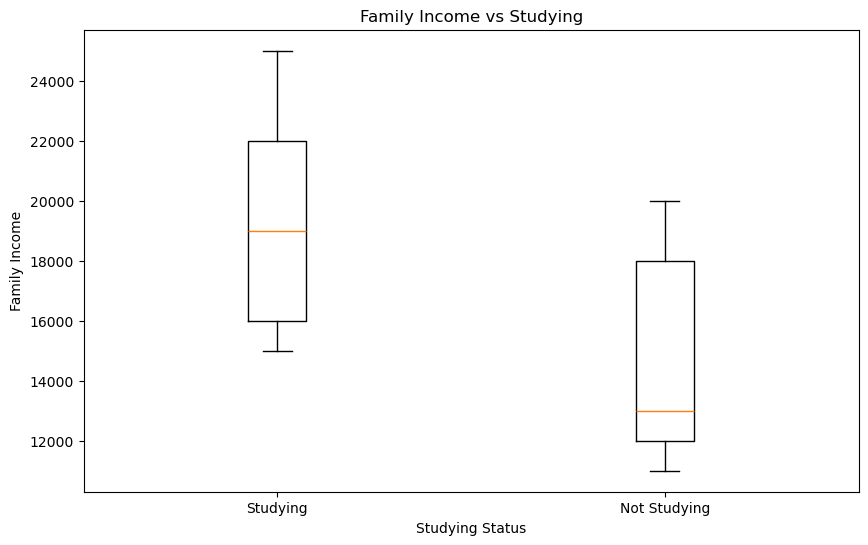

In [72]:
# Family Income vs Studying
studying = df[df['Studying'] == 1]['Family_Income']
not_studying = df[df['Studying'] == 0]['Family_Income']

print("Studying Income Data:\n", studying)
print("Not Studying Income Data:\n", not_studying)

plt.figure(figsize=(10, 6))
plt.boxplot([studying, not_studying], labels=['Studying', 'Not Studying'])
plt.title('Family Income vs Studying')
plt.xlabel('Studying Status')
plt.ylabel('Family Income')
plt.show()

**The boxplot will show the median, quartiles, and possible outliers for family income of students who are studying vs. those who are not.
The boxplot shows that students who are currently studying (1) tend to have slightly higher family incomes compared to those who are not studying (0). This suggests that economic factors might play a role in whether students continue their education.**

None Dropout Age Data:
 5    14
7    15
9    17
Name: Age, dtype: int64
Voluntary Dropout Age Data:
 0    14
1    16
3    17
4    15
8    14
Name: Age, dtype: int64
Involuntary Dropout Age Data:
 2    18
6    16
Name: Age, dtype: int64


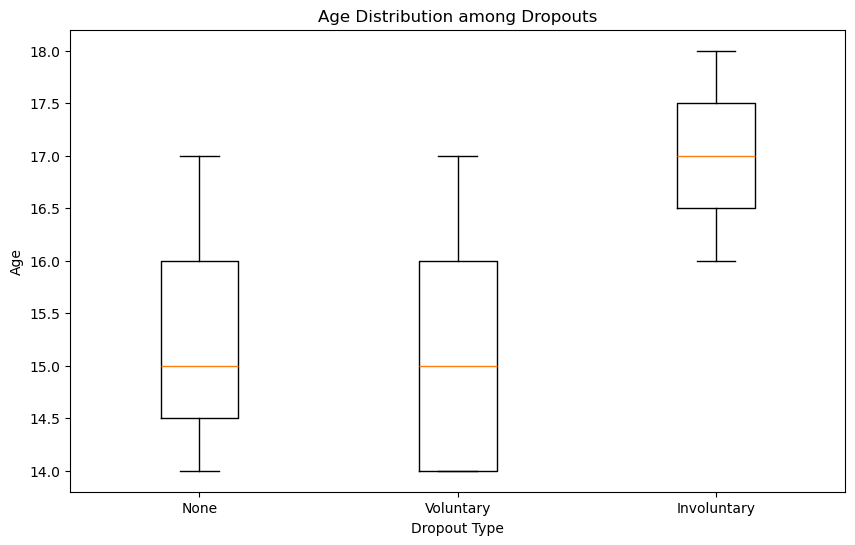

In [74]:
# Age Distribution among Dropouts
none_dropout = df[df['Dropout_Type'] == 0]['Age']
voluntary_dropout = df[df['Dropout_Type'] == 1]['Age']
involuntary_dropout = df[df['Dropout_Type'] == 2]['Age']

print("None Dropout Age Data:\n", none_dropout)
print("Voluntary Dropout Age Data:\n", voluntary_dropout)
print("Involuntary Dropout Age Data:\n", involuntary_dropout)

plt.figure(figsize=(10, 6))
plt.boxplot([none_dropout, voluntary_dropout, involuntary_dropout], labels=['None', 'Voluntary', 'Involuntary'])
plt.title('Age Distribution among Dropouts')
plt.xlabel('Dropout Type')
plt.ylabel('Age')
plt.show()


**The boxplot shows the median, quartiles, and possible outliers for ages of different dropout types.
The boxplot indicates that the age distribution of voluntary and involuntary dropouts overlaps significantly. Both types of dropouts tend to occur in the mid to late teenage years (14-18), which aligns with the period when students transition between different educational stages.**

Correlation Matrix:
                 Studying  Family_Income  Family_Members   BPL/APL  \
Studying        1.000000       0.534884       -0.707107 -1.000000   
Family_Income   0.534884       1.000000       -0.591996 -0.534884   
Family_Members -0.707107      -0.591996        1.000000  0.707107   
BPL/APL        -1.000000      -0.534884        0.707107  1.000000   
Dropout_Type   -0.714286      -0.495017        0.303046  0.714286   
Age             0.147442       0.144013       -0.364900 -0.147442   

                Dropout_Type       Age  
Studying           -0.714286  0.147442  
Family_Income      -0.495017  0.144013  
Family_Members      0.303046 -0.364900  
BPL/APL             0.714286 -0.147442  
Dropout_Type        1.000000  0.379136  
Age                 0.379136  1.000000  


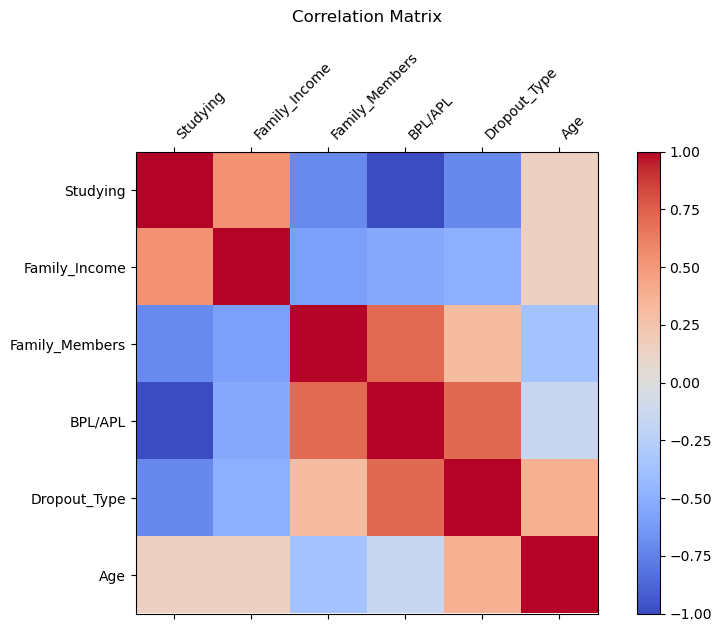

In [92]:
# Convert categorical data to numerical values for analysis
df['Studying'] = df['Studying'].apply(lambda x: 1 if x == 'Yes' else 0)
df['BPL/APL'] = df['BPL/APL'].apply(lambda x: 1 if x == 'BPL' else 0)
df['Dropout_Type'] = df['Dropout_Type'].apply(lambda x: 1 if x == 'Voluntary' else (2 if x == 'Involuntary' else 0))

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Visualizing the correlation matrix using matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix', pad=20)
fig.colorbar(cax)

# Setting axis labels
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='left')
ax.set_yticklabels(correlation_matrix.columns)

plt.show()

#### **SIGNIFICANT CONCLUSIONS FROM THE CORRELATION MATRIX**
**1. Studying vs. Family Income (0.53)**
   - Positive Correlation: A positive correlation is shown by a value of 0.23. This indicates that there is a marginally higher likelihood of study among pupils from wealthier backgrounds.
**2. Studying vs. Dropout Type (-0.714)**
   - Strong Negative Correlation: A negative correlation is shown by a value of -0.714. This implies that students are less likely to have left school, especially unintentionally.
**3. Family Income vs. BPL/APL (-0.53)**
   - Moderate Negative Correlation: A value of -0.53 suggests that families with higher income are less likely to be below the poverty line (BPL).
**4. Family Income vs. Age (0.50)**
   - Moderate Positive Correlation: A value of 0.50 indicates that older students tend to come from families with higher income.
**5. Family Income vs. Family Members (0.31)**
   - Weak Positive Correlation: A value of 0.31 shows a weak positive correlation, suggesting that larger families might have slightly higher incomes.
**6. Family Members vs. Age (-0.29)**
   - Weak Negative Correlation: A value of -0.29 indicates that families with more members tend to have slightly younger students.
  
#### **REPRESENTING THE CORRELATION MATRIX**
1. Diagonal Elements: All diagonal elements are 1, as each variable is perfectly correlated with itself.
2. Color Coding: The color intensity indicates the strength of the correlation. A darker color (red or blue) indicates stronger positive or negative correlations, respectively.
3. Axis Labels: The variables on the x-axis and y-axis correspond to the variables in the DataFrame.

#### **BASED ON THIS CORRELATION MATRIX, THE FOLLOWING DEDUCTIONS CAN BE MADE:**

**1. Impact of Income:** Family income highlights socioeconomic factors in education by having a discernible effect on students' age and whether or not they are studying.
**2. Dropout Insights:** Research indicates that studying is strongly correlated with certain types of dropouts, highlighting the significance of keeping students enrolled in order to prevent dropouts.
**3. Family Dynamics:** There appears to be some association between family size and income, indicating that better incomes may be achieved by larger families—possibly as a result of having more earners.